# **MÓDULO 18 - Pratique**
# Regressão Linear

Agora que aprendemos como aplicar a regressão linear simples e múltipla, colocaremos em prática os conceitos vistos na aula.

Temos aqui uma base de imóveis para alugar, precisamos desenvolver um modelo de regressão linear múltipla para conseguir prever o preço de imóveis dadas as variáveis independentes do nosso modelo.

**Atenção! Esse é seu primeiro modelo, caso tenha dificuldade conte com a ajuda da tutoria**

Você notará que alguns códigos já estão presentes para facilitar a construção de vocês.

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [56]:
df = pd.read_csv("ALUGUEL.csv", delimiter=';')

df.head(10)

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
0,480,295,48,2,2,1,1
1,500,0,50,1,2,1,1
2,500,0,40,1,2,1,1
3,500,36,45,1,2,1,0
4,500,0,30,1,1,0,0
5,500,380,66,2,1,0,1
6,550,100,48,2,2,1,1
7,600,110,46,2,2,1,1
8,600,100,49,2,2,1,1
9,600,325,50,2,2,1,1


Legenda dos dados:

*   **Valor_Aluguel** : valor Total pago no aluguel

*   **Valor_Condominio** : Valor do Condomínio.

*   **Metragem** : Metragem do Apartamento.

*   **N_Quartos** : Número de Quartos do Imóvel.

*   **N_banheiros** : Número de banheiros.

*   **N_Suites** : Número de Suítes.

*   **N_Vagas** : Número de Vagas.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [57]:
# ---  Verificar tipos de dados ---
df.dtypes

,0
Valor_Aluguel,int64
Valor_Condominio,int64
Metragem,int64
N_Quartos,int64
N_banheiros,int64
N_Suites,int64
N_Vagas,int64


In [58]:
# --- Verificar valores faltantes ---
df.isnull().sum()

,0
Valor_Aluguel,0
Valor_Condominio,0
Metragem,0
N_Quartos,0
N_banheiros,0
N_Suites,0
N_Vagas,0


Com a verificação dos tipo de dados e valores faltantes, verificação que esta tudo certinho, não vamos retirar nenhum dados ou fazer alteração pois ja esta correto e todas as colunas afetam uma a outra, pois são dados reais.

# 2 - Realize a segunda etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.


B) Caso note uma variável que te pareça conter outliers realiza a análise e tratamento desses dados, justificando a escolha do método utilizado.

C) Realize a análise bivariada dos dados. Faça uso de pelo menos 3 gráficos e traga insights acerca do analisado.

In [59]:
# --- Verificação de distribuição de dados ---
df.describe()

,Valor_Aluguel,Valor_Condominio,Metragem,N_Quartos,N_banheiros,N_Suites,N_Vagas
count,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.000000,7203.00000
mean,2966.596140,811.538109,88.506178,2.300153,2.095932,1.016660,1.44176
std,2948.720385,796.564846,61.567505,0.826615,0.983812,0.874204,0.86993
min,480.000000,0.000000,30.000000,1.000000,1.000000,0.000000,0.00000
25%,1350.000000,395.000000,52.000000,2.000000,2.000000,1.000000,1.00000
50%,2000.000000,592.000000,67.000000,2.000000,2.000000,1.000000,1.00000
75%,3200.000000,980.000000,100.000000,3.000000,2.000000,1.000000,2.00000
max,25000.000000,9500.000000,880.000000,10.000000,8.000000,5.000000,9.00000


Text(0, 0.5, 'N_Quartos')

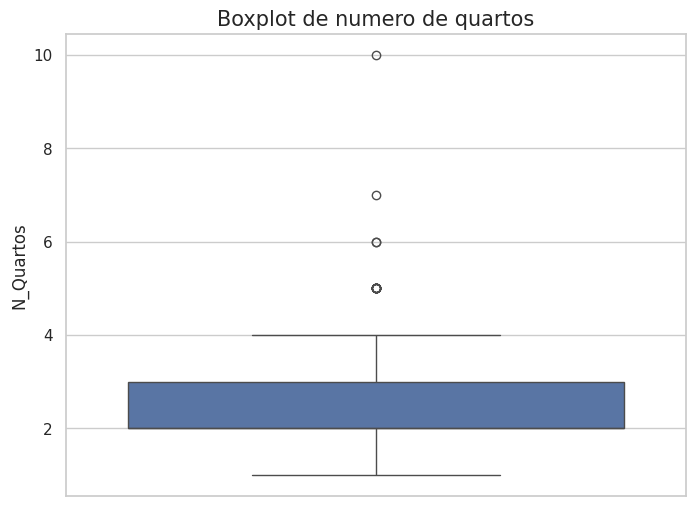

In [60]:
# --- Blox plot Numero de quartos ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['N_Quartos'])
plt.title('Boxplot de numero de quartos', fontsize=15)
plt.ylabel('N_Quartos', fontsize=12)

Verificando nesse grafico que podemos ver varios outliers, supondo que essa base é de apartamento de predio valores acima de 4 ja esta apresentando um valor muito errado

Text(0, 0.5, 'Valor_Aluguel')

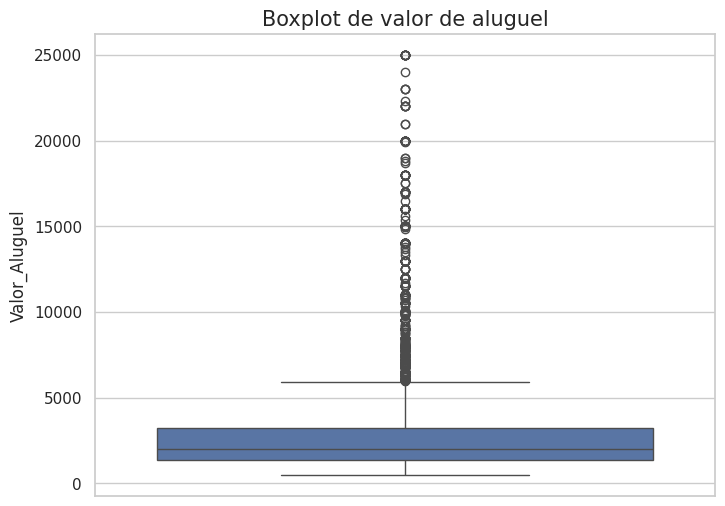

In [61]:
# --- Blox plot Valor_Aluguel ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Valor_Aluguel'])
plt.title('Boxplot de valor de aluguel', fontsize=15)
plt.ylabel('Valor_Aluguel', fontsize=12)

Podemos ver que maiora do valores da base que temos fica entre 0 a 6 mil reais ea media deles entre 3 mil, também podemos vericar outliers com valor acima de 6 a 25 mil.

Text(0, 0.5, 'Valor_Condominio')

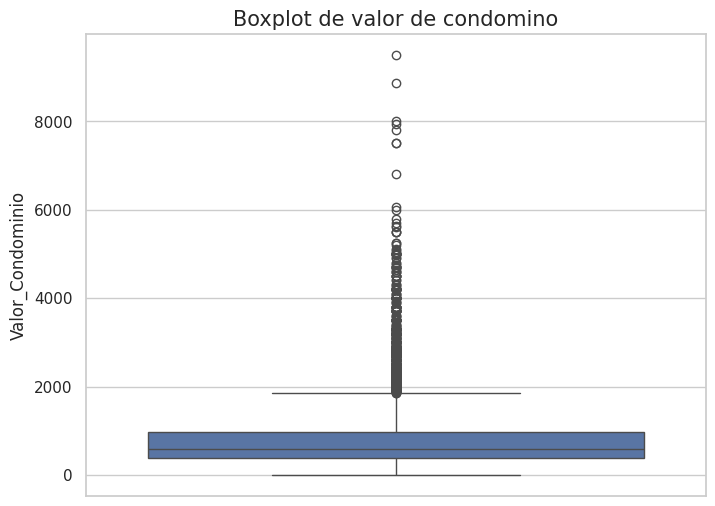

In [62]:
# --- Blox plot Valor_Condominio ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Valor_Condominio'])
plt.title('Boxplot de valor de condomino', fontsize=15)
plt.ylabel('Valor_Condominio', fontsize=12)

Text(0, 0.5, 'Metragem')

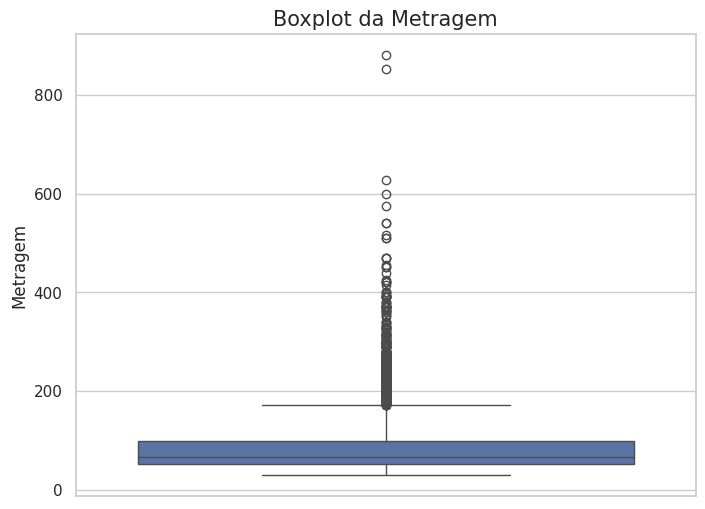

In [63]:
# --- Blox plot Metragem ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Metragem'])
plt.title('Boxplot da Metragem', fontsize=15)
plt.ylabel('Metragem', fontsize=12)

Com base nesse grafico podemos ver que o valor da maioria dos apartamentos fica entre 0 a 180 metros, e temos  uma boa parte fora da curva entre 180 a 400, e outros outliers ate 900 metros quadrados.

Text(0, 0.5, 'N_banheiros')

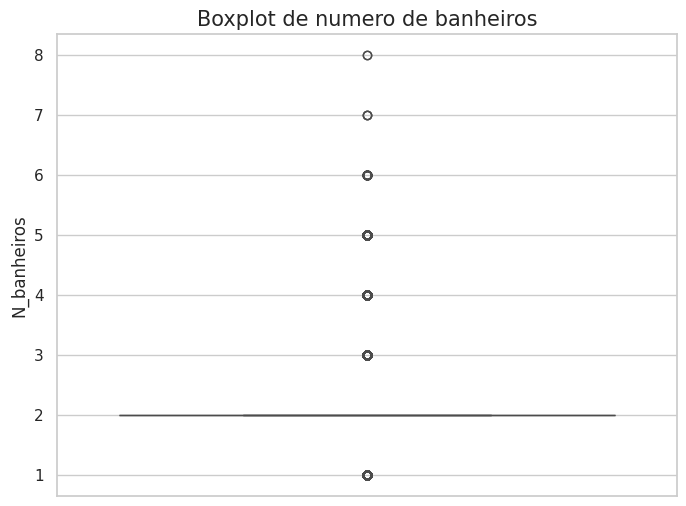

In [64]:
# --- Blox plot Numero de banheiros ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['N_banheiros'])
plt.title('Boxplot de numero de banheiros', fontsize=15)
plt.ylabel('N_banheiros', fontsize=12)

Aqui podemos ver que o numero de banheiros é bem distribuidos, assim o grafico de bloxplot fica somente no numero 2 e os outliers bem distribuidos ate 8

Text(0, 0.5, 'N_Suites')

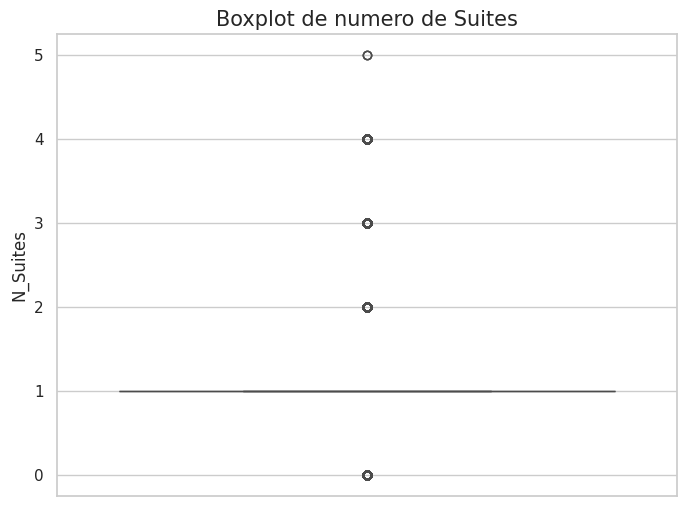

In [65]:
# --- Blox plot Numeros de suites ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['N_Suites'])
plt.title('Boxplot de numero de Suites', fontsize=15)
plt.ylabel('N_Suites', fontsize=12)

Nesse grafico podemos ver que a maioria dos apartametos possuiu apenas 1 suite, e outliers apresentam até 5 suites por apartamento.

Text(0, 0.5, 'N_Vagas')

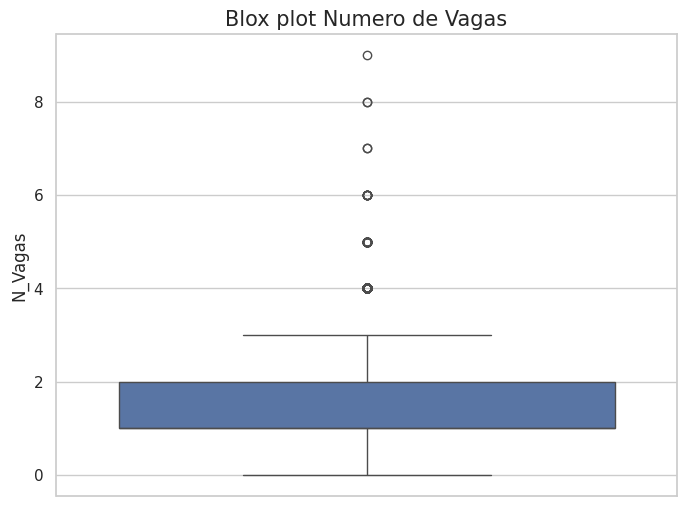

In [66]:
# --- Blox plot Numero de Vagas ---
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['N_Vagas'])
plt.title('Blox plot Numero de Vagas', fontsize=15)
plt.ylabel('N_Vagas', fontsize=12)

O numero de vagas apresenta uma distribuição de 0 a 3 vagas por apartamento, mas podendo chegar nos outliers ate 9 vagas por apartamento

Verificando minuciosamente os dados podemos ver que todas as informação nessa base possui outliers, considerando que que são dados de apartamentos.

| Coluna               | % de Outliers | Observações                                                                                    |
| -------------------- | ------------- | ---------------------------------------------------------------------------------------------- |
| **N_banheiros**      | **40,77%** 🚨 | Muito acima do normal — provavelmente existem valores fora do padrão esperado  |
| **N_Suites**         | **37,90%** 🚨 | Muitas unidades com valores extremos                  |
| **Valor_Aluguel**    | 10,40%        | Valores muito altos ou mais baratos que o esperado.                                            |
| **Metragem**         | 8,98%         | Áreas muito pequenas ou extremamente grandes.                                                  |
| **Valor_Condominio** | 8,14%         | Condomínios muito altos ou muito baixos.                                                       |
| **N_Vagas**          | 3,54%         | Poucos outliers — geralmente ok.                                                               |
| **N_Quartos**        | 0,22%         | Quase sem outliers.                                                                            |


In [67]:
df["N_banheiros"] = df["N_banheiros"].clip(1, 4)
df["N_Suites"] = df["N_Suites"].clip(0, 3)


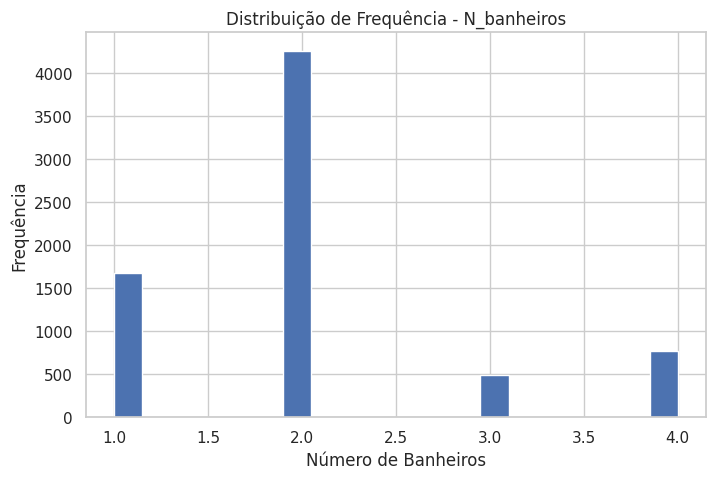

In [68]:
plt.figure(figsize=(8, 5))
plt.hist(df["N_banheiros"], bins=20)
plt.title("Distribuição de Frequência - N_banheiros")
plt.xlabel("Número de Banheiros")
plt.ylabel("Frequência")
plt.show()

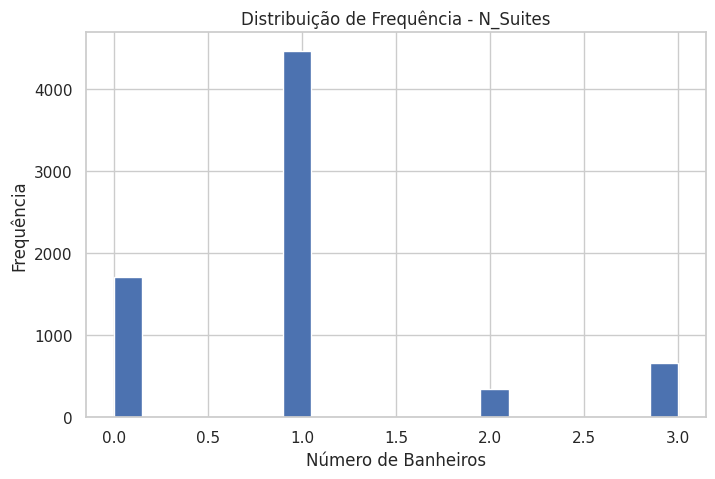

In [69]:
plt.figure(figsize=(8, 5))
plt.hist(df["N_Suites"], bins=20)
plt.title("Distribuição de Frequência - N_Suites")
plt.xlabel("Número de Suites")
plt.ylabel("Frequência")
plt.show()

utilizado o Limite Manual para ajustar a distribuição para não deixar valores extremos, não utilizado o IQR pois iria ajustar tudo para 2 por conta da mediana ser e não ter muitos valores ditribuidos, assim manter a diversidade dos valores e um valor consistente.
Retirar esses dados perderiamos mais de 40% dos dados da base


# 3 - Realize a terceira etapa de pré processamento dos dados.

A) Comece pela correlação, que sabemos ser uma parte importante para nosso pré processamento e análise. Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.




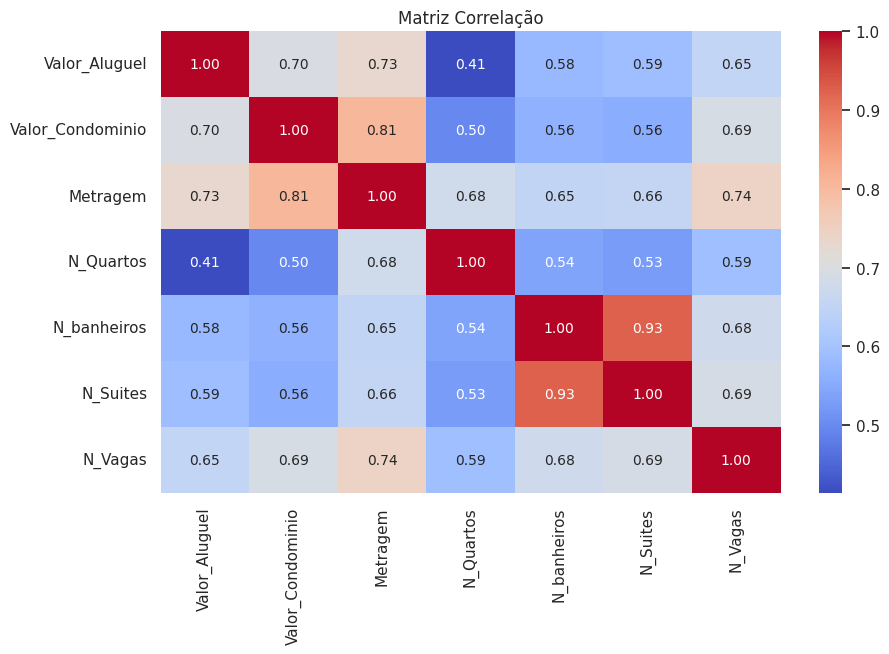

In [78]:
# Matriz de Correlação das Variáveis Numéricas
correlation_matrix = df.select_dtypes(include='number').corr()

# Criando um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix,
           annot=True,
           cmap='coolwarm',
           fmt='.2f',
           annot_kws={'size': 10})
plt.title('Matriz Correlação')
plt.show()

Podemos ver com o grafico de heatmap ou matriz de Corelação que possuem muitas relaçao forte como N_banheiros e N_Suites, Metragem e Valor_Condominio

Relação forte - as duas sobem de acordo com o valor uma da outras
N_banheiros e N_Suites possuem 0.93
Metragem e Valor_Condominio possuem 0.81

Relação fraca - uma sobre é outra desce
Valor_Aluguel e N_Quartos possuem 0.41
N_Quartos e Valor_Aluguel possuem 0.41



B) Durante a aula, por nossa base ser pequena e demonstrativa não realizamos a separação de treino e teste, porém para as atividades do dia dia temos que fazer, nesse exercício separe treino e teste.

Lembre-se que primeiro separamos as variaveis dependentes X e depois Y, essa etapa deixarei para vocês abaixo:

In [79]:
X = df.drop('Valor_Aluguel', axis=1) #Separando X - Todas variáveis exceto valor_aluguel
y = df['Valor_Aluguel'] #Separando Y (Apenas variavel valor_aluguel)

Dica: Para separar em treino e teste usamos o train_test_split, como visto nas aulas de pré modelagem.

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# 3 - Treine um modelo de regressão Linear simples

A) Vamos utilizar apenas X_train e y_train para rodar um modelo de regressão linea simples e para isso usaremos apenas uma váriavel, a váriavel metragem.

In [81]:
X = X_train[['Metragem']]  # Variável independente (características)
y = y_train  # Variável dependente (rótulo)
# se você deu um nome diferente para x train e y train, altere no código.

In [82]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

B) Plote o intercept_ e coef_ e monte de forma extensa a equação da reta.

In [83]:
intercepto = modelo.intercept_
coeficiente = modelo.coef_[0]

print("Intercepto:", intercepto)
print("Coeficiente:", coeficiente)

Intercepto: -96.99896039931718
Coeficiente: 34.47397089324867


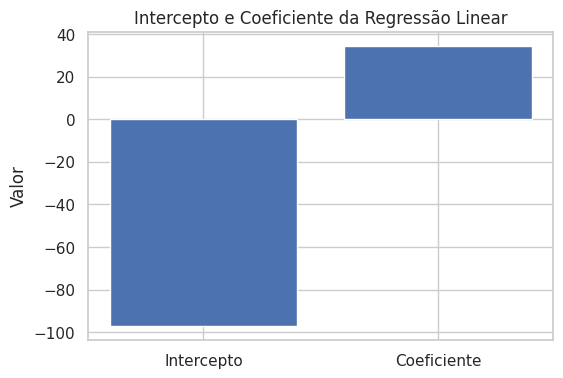

In [84]:
plt.figure(figsize=(6,4))
plt.bar(['Intercepto', 'Coeficiente'], [intercepto, coeficiente])
plt.title("Intercepto e Coeficiente da Regressão Linear")
plt.ylabel("Valor")
plt.show()

In [85]:
print(f"Equação da reta:  Valor_Aluguel = {intercepto:.2f} + {coeficiente:.2f} * Metragem")

Equação da reta:  Valor_Aluguel = -97.00 + 34.47 * Metragem


Nossa equação seria:  Valor_Aluguel = -97.00 + 34.47 * Metragem

c) Calcule o R quadrado para o modelo de treinamento. Não esqueça de avaliar e trazer em formato de insight se esse resultado te parece bom ou não.

In [88]:
y_pred_train = modelo.predict(X)
r2 = r2_score(y, y_pred_train)

print("R² (treino):", r2)

R² (treino): 0.521363231851778


Podemos ver que o valor ficou em 0.52, mas comparando com o valor na matriz relacional ele apresenta 0.73, é um bom resultado comparando com o tamanho da base de dados e com os valores que temos que não é 100% perfeito, ele traz um boa relação com os dado que temos.

D) Plote o gráfico da reta de regressão encontrada e traga insights acerca da dispersão dos pontos e ajuste da reta.

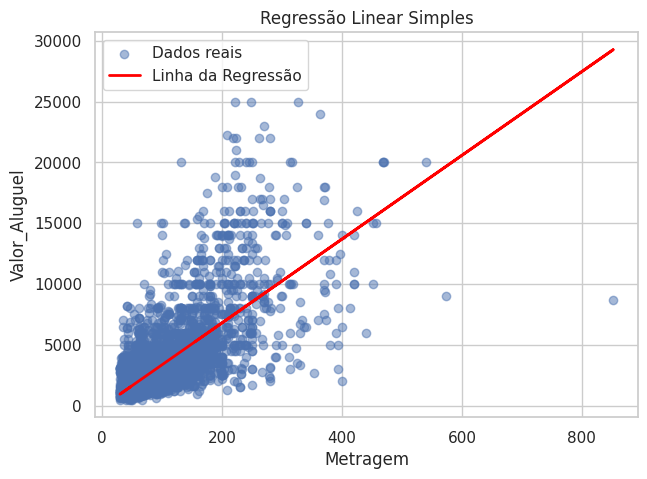

In [89]:

y_pred = modelo.predict(X)

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.5, label='Dados reais')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linha da Regressão')
plt.xlabel('Metragem')
plt.ylabel('Valor_Aluguel')
plt.title('Regressão Linear Simples')
plt.legend()
plt.show()

Podemos ver uma fraca relação entre as duas variveis da metragem com Valor_Aluguel, é possivel ver que maior a metragem o valor do Aluguel mais não proporcionalmente, a muitos pontos dispersos da linha central como acime e abaixo dela.

E) Para finalizar vamos aplicar o modelo a base de teste. Essa etapa é nova, então agora vocês avaliaram como o modelo treinado se saiu com a base de testes.
Para isso altere no código abaixo o nome do seu modelo de regressão:

In [90]:
X_test = X_test[['Metragem']]  # Variável independente (características)
y_test = y_test  # Variável dependente (rótulo)

In [91]:
# Usando o modelo treinado para fazer previsões sobre os dados de teste
previsoes = modelo.predict(X_test)

# Avaliando o desempenho do modelo usando métricas como o R²
r2 = modelo.score(X_test, y_test)

print("Coeficiente de Determinação (R²) nos Dados de Teste:", r2)


Coeficiente de Determinação (R²) nos Dados de Teste: 0.5697993791211697


Se o valor do coeficiente de determinação (R²) para os dados de treinamento for melhor (ou seja, mais próximo de 1) do que o R² para os dados de teste, isso sugere que o modelo está superajustado aos dados de treinamento. Isso significa que o modelo pode estar se ajustando muito bem aos padrões específicos nos dados de treinamento, mas pode não generalizar bem para novos dados que não foram vistos durante o treinamento.

Por outro lado, se o R² para os dados de teste for melhor do que o R² para os dados de treinamento, isso pode ser indicativo de que o modelo está subajustado. Isso significa que o modelo não está se ajustando adequadamente aos padrões nos dados de treinamento e não está capturando a relação entre as variáveis independentes e dependentes de forma eficaz.

Idealmente, gostaríamos que o valor do R² fosse consistente entre os dados de treinamento e teste, indicando que o modelo é capaz de generalizar bem para novos dados. Se houver uma grande diferença entre os valores de R² para os dados de treinamento e teste, isso sugere que o modelo pode precisar de ajustes para melhorar sua capacidade de generalização.

F) Avalie com suas palavras o valor do r quadrado encontrado no treino e no teste.

Com o valor de teste foi de 0.52 e o valor de teste apresenta 0.56, não apresenta uma melhora significativa mas também não um aumento significativa, assim o modelo apresenta uma eficacia muito boa perante os dados mal distribuidos que apresenta os dados, se caso o valor de teste apresentasse um aumento muito alto ou um valor abaixo do valode de teste exemplo 0.9 ou 0.4 seria um resultado muito ruim e teria que refazer todos os processo para ter um modelo eficaz

# 4 - Aplicação do modelo de regressão linear multipla!

A) Vamos refazer os passos anteriores porém para regressão multipla, com todas variáveis dependentes. Comece separando a base treino e teste, dessa vez com todas variáveis para X.

Aqui é só refazer os passos do exercicio 3 porém ao invés de trazer para X apenas metragem, você deve trazer todas colunas (exceto a valor do aluguel).

In [92]:
# X = todas as colunas exceto a variável alvo
X = df.drop('Valor_Aluguel', axis=1)

# y = variável alvo
y = df['Valor_Aluguel']

# Separando em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

B) Faça o modelo de regressão linear multipla aplicado só a base de treino.

In [93]:
modelo_multi = LinearRegression()
modelo_multi.fit(X_train, y_train)

LinearRegression()

C) Traga o valor do R quadrado e avalie o valor encontrado.

In [94]:
y_pred_train = modelo_multi.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)

print("R² (treino):", r2_train)

R² (treino): 0.5949899421638056


D) Para finalizar aplique o modelo a base de teste e traga o r quadrado de teste.
Dica: Você pode usar os códigos do exercício anterior.

In [95]:
y_pred_test = modelo_multi.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)

print("R² (teste):", r2_test)

R² (teste): 0.641991988090657


E) Compare os r quadrados encontrados pela regressão linear e pela regressão múltipla. Qual modelo te parece melhor? Por qual motivo acredita que isso ocorreu?

Comparando o valor teste anterior temos 0.52 e com o conjunto completo 0.59, o valor de teste de 0.56 no simples e no multiplo 0.69.
Essa variação apresentou por conta que incluimos mais variveis que apresenta uma corelação maior sobre o valor do Aluguel.
Ainda assim é um modelo superior o multiplo e não apresentou um aumento muito grande no teste para ser um teste ruim.